In [30]:
import requests
from IPython.core.display import HTML
HTML(f"""
<style>
@import "https://cdn.jsdelivr.net/npm/bulma@0.9.4/css/bulma.min.css";
</style>
""")

# Introduction to the exercise
In this exercise you will implement and apply PCA to a database consisting of face shapes. The exercise lays the foundations for assignment 2. 

<article class="message">
    <div class="message-body">
        <strong>List of individual tasks</strong>
        <ul style="list-style: none;">
            <li>
            <a href="#eval">Task 1: Reflection on reconstruction</a>
            </li>
            <li>
            <a href="#implementation">Task 2: Dimensionality reduction and reconstruct…</a>
            </li>
            <li>
            <a href="#eval2">Task 3: Evaluating reconstruction error</a>
            </li>
        </ul>
    </div>
</article>


**Important**
This exercise and the in-class exercise are very similar, but use different datasets. In this exercise you should use your implementation from the in-class exercise, but we advise that you actually go through the steps again to understand the algorithm and not only the results.

## Data
The dataset used for the assigment consists of 120 landmarks (2D points) of faces (data space). A face consists of 73 (x,y)-coordinate pairs, i.e. 146 featues in total.
The following cell imports the necessary libraries, loads the data and uses the function `plot_many_faces`
 to  visualize 6 faces.


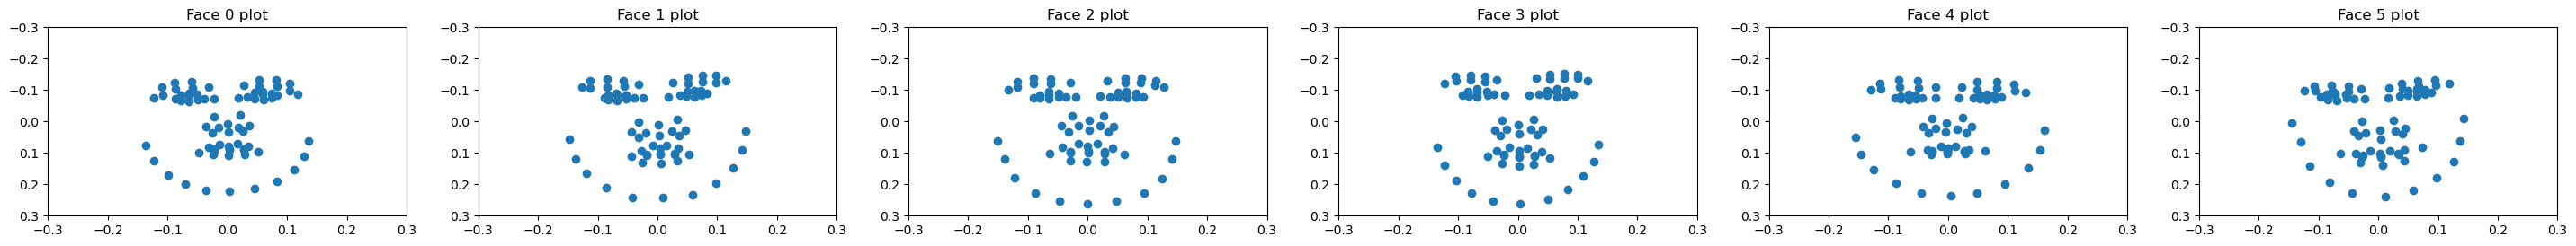

In [31]:
import matplotlib.pyplot as plt
import numpy as np

from pca_utils import *

path = './db'
shapes, images = face_shape_data(path)
plot_many_faces(shapes[:6])

## Implementing PCA
An application of principal component analysis is about finding a linear projection (transformation)
that reduces the number of dimensions used to represent the data while
retaining a certain proportion of the total variation. 
Let $X$ $\in \mathbb{R}^{N \times D}$ be the data matrix, $C$ $\in \mathbb{R}^{D \times D}$ the covariance matrix of $X$, and $V$ $\in \mathbb{R}^{D \times D}$ the matrix of eigenvectors of $C$:

$$

{V} = \begin{bmatrix} | & | & & | \\ {v}_1 & {v}_2 & \cdots & {v}_D  \\ | & | & & | \end{bmatrix}.

$$
Assume, the eigenvectors ${v}_i$ are sorted according to their eigenvalues $\lambda_i$. The eignevalue of the covariance matrix $\lambda_i$ gives the variance along the eignevector directions. The sum of all eigenvalues $\lambda^{(1)}+\dots+\lambda^{(D)}$ gives the total variance of the data. 
(1) **Proportional variance** is the proportion of the total variance explained by a single component. 

$$\frac{\lambda^{(i)}}{\lambda^{(1)} + \dots + \lambda^{(D)}}$$
(2) **Cumulative variance** is the cumulative proportion of the total variance explained by the first $k$ components.

$$\frac{\lambda^{(1)} + \dots + \lambda^{(k)}}{\lambda^{(1)} + \dots + \lambda^{(D)}}$$
Define $\Phi_k$, as the $D\times k$ matrix of the first $k$ eigenvectors of $V$:

$$

{\Phi} = \begin{bmatrix} | & | & & | \\ {v}_1 & {v}_2 & \cdots & {v}_k \\ | & | & & | \end{bmatrix}.

$$
The column vectors of ${\Phi_k}$ constitute the orthonormal basis of the latent space. ${\Phi_k}$ can be used to transform data points between the data space and the latent space. The mapping of a point $x$ from data space to latent space is given by:

$$ 
\mathbf{a} = \mathbf{\Phi_k}^\top(\mathbf{x}-\mathbf{\mu}),
$$
and back into data space:

$$
x  = \mathbf{\Phi_k} \mathbf{a} + \mathbf{\mu}
$$
If $k = D$ (keeping all dimensions) will result in no data loss because it is a change of basis in the same $D$ dimensions. Retaining  $k<D$  principal components and consequently discarding the remaining  $r = D - k$  components, it is effectively assumed that these $r$ components do not contain significant information, e.g. noise. The percentage of the total variance that is removed is given by:

$$\frac{\lambda^{(D-k)} + \dots + \lambda^{(D)}}{\lambda^{(1)} + \dots + \lambda^{(D)}}$$
where  $\lambda^{(i)}$  are the eigenvalues sorted in descending order $( \lambda^{(1)} \geq \lambda^{(2)} \geq \dots \geq \lambda^{(D)} )$.
That is there will be a _reconstruction error_ $\epsilon = x - \tilde{x}$,  by first mapping the data $x$ to latent space by $\mathbf{a} = \mathbf{\Phi_k}^\top(\mathbf{x}-\mathbf{\mu})$ and then  back to data space by $\tilde{x}  = \mathbf{\Phi_k} \mathbf{a} + \mathbf{\mu}$.

---
**Task 1 (easy): Reflection on reconstruction💡**
1. Why do we get a reconstruction error $\epsilon$?
2. What is the expected error $\epsilon$ when $k=D$? 
3. (Optional) Show 2 mathematically. 
4. How does the expected error change when we decrease $k$?


---

In [32]:
# write answers here
'''
1. Reconstruction error ∊

Because when we initally map the data we will only get something close to the truth, unless we of course choose to map without removing
any dimensions from the data, but then there is no reason at all to do pca. 

2. Expected error E when K = D

The expected error will be 0. Since we're not doing anything. 

3. Show 2 

4 How does expected error change with decreasing K?

propertional to K, so the lower K the higher the error and vice versa. 

'''



"\n1. Reconstruction error ∊\n\nBecause when we initally map the data we will only get something close to the truth, unless we of course choose to map without removing\nany dimensions from the data, but then there is no reason at all to do pca. \n\n2. Expected error E when K = D\n\nThe expected error will be 0. Since we're not doing anything. \n\n3. Show 2 \n\n4 How does expected error change with decreasing K?\n\npropertional to K, so the lower K the higher the error and vice versa. \n\n"

The next task is about implementing PCA and transforming data between data space and latent space.

---
**Task 2 (medium): Dimensionality reduction and reconstruction👩‍💻**
1. **Complete PCA:** Following the comments in the function template, complete the `get_principle_components`
 function below to calculate and return all principle components of the dataset. **Make sure to center the samples (subtract the mean before calculating the covariance matrix)**.

2. **Calculate variance:** Complete the `variance_proportion_plot`
 function according to the comments in the function template to calculate the _proportional_ and _cumulative_ variance. The function already includes code to plot both on a single graph. Once the function is complete, generate the plot to display the _proportional_ and _cumulative_ variances.

3. Complete the `transform_to_latent_space`
 function that transforms the data from the data space to latent space
( [Equation 1](#eq:trans) ) 



$$
 \mathbf{a} = \mathbf{\Phi}^\top(\mathbf{x}-\mathbf{\mu})
$$
4. Complete the `transform_from_latent_space`
 function that transforms the data from the  latent space to the data space
( [Equation 2](#eq:inv) ).


$$
 \mathbf{x} = \mathbf{\Phi} \mathbf{a} + \mathbf{\mu}
$$

**Tip**
Some of the later tasks will be easier if you return all 146 principle components. You can then create another function for extracting $k$ components to generate $\Phi_k$.


---

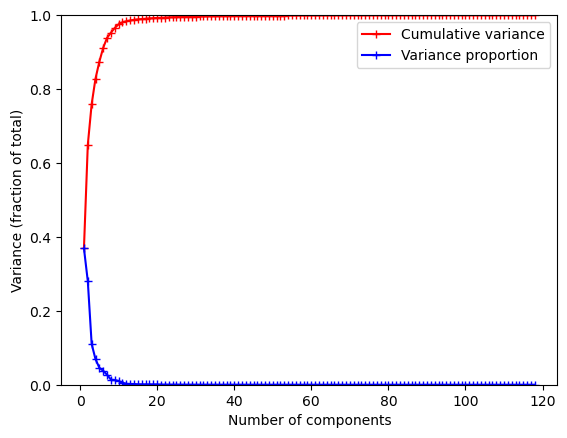

In [37]:
## 1

def get_principle_components(X):
    """Calculates principle components for X.

    Args:
        X: The dataset. An NxD array were N are the number of samples and D are
        the number of features.

    Returns:
        Tuple (components, eigenvalues, mu) where components is a DxD matrix of
        principle components, eigenvalues is a D-element vector of
        corresponding eigenvalues, and mu is a D-element array containing the mean
        vector.
    """
    # Write solutions here
    mean_vector = np.mean(X, axis=0)


    cov_matrix = np.cov(X, rowvar=False)
    eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)
    sorted_indices = np.argsort(eigenvalues)[::-1]
    sorted_eigenvalues = eigenvalues[sorted_indices]
    eigenvectors_sorted = eigenvectors[:, sorted_indices]

    #print(eigenvalues)
    #print(eigenvectors)
    #print(centered_data)

    return (eigenvectors_sorted, sorted_eigenvalues, mean_vector) 


    
## 2 

def variance_proportion_plot(pc_values, max=1):
    """
    Plots the cumulative and individual variance proportions for principal components.

    Args:
        pc_values: 1D array of eigenvalues representing the variance explained by each principal component.
        max: Maximum cumulative variance proportion to display (between 0 and 1).

    Returns:
        None. Displays a plot of cumulative and individual variance proportions.
    """
    # Calculate total variance, cumulative variance, and individual variance proportions
    total = np.sum(pc_values) # write your solution here

    cumulative = np.cumsum(pc_values) / total

    proportion = cumulative
    # Individual variance proportion for each component
    each = pc_values / total



    # Find the minimum number of components required to reach the desired cumulative variance
    max_idx = np.argwhere(proportion >= max - 1e-7)[0, 0]
    
    # Set the x-axis values (number of components) up to the determined threshold
    x = np.arange(1, max_idx + 1, 1)

    # Create the plot
    plt.figure()
    plt.xlabel('Number of components')
    plt.ylabel('Variance (fraction of total)')
    
    # Plot cumulative variance proportion and individual variance proportion
    plt.plot(x, proportion[:max_idx], 'r-+', label='Cumulative variance')
    plt.plot(x, each[:max_idx], 'b-+', label='Variance proportion')

    # Set the y-axis limit and add a legend
    plt.ylim(0, 1)
    plt.legend(['Cumulative variance', 'Variance proportion'])
    
    # Display the plot
    plt.show()



comp, val, mu = get_principle_components(shapes)
variance_proportion_plot(val)


## 3

def transform_to_latent_space(X, principle_components, mu):
    """Transforms X to an k-dimensional space where k is the number of
    principle_components.

    Args:
        X: The dataset. An NxD array were N are the number of samples and M are
        the number of features.
        principle_components: An Dxk matrix containing the principle
        components.
        mu: A D-element array containing the mean vector.

    Returns:
        A Nxk array describing the transformed data.
    """
    centered_data = X - mu
    return np.dot(centered_data, principle_components)



## 4

def transform_from_latent_space(v, principle_components, mu):
    """Reverses the dimensionality reduction of v, a Nxk matrix where
    k is the number of principle components. The result is a NxD matrix.

    Args:
        v: The transformed (latent space) dataset with size Nxk.
        principle_components: An Dxk matrix containing the principle
        components.
        mu: A D-element array containing the mean vector.

    Returns:
        An NxD array reconstruction of the original feature vectors X.
    """

    return np.dot(v, principle_components.T) + mu

## Reconstruction error
This task involves implementing a method to calculate the reconstruction error and using it to examine the impact of varying the number of principal components. The root mean square error (RMSE) is used for calculating the reconstruction error:

$$RMSE(x, \widetilde{x}) = \sqrt{\frac{1}{N}\sum_i (x_i-\widetilde{x}_i)^2},$$
where $x$, $\widetilde{x}$ are the original and transformed samples
respectively and $N$ is the total number of samples $x_i$.

---
**Task 3 (medium): Evaluating reconstruction error**
1. **Calculate reconstruction error:** Complete the `reconstruction_error`
 function according to the comments in the function template to calculate the reconstruction error.

2. **Plot reconstruction error:** Use the  `reconstruction_error_plot`
 function to plot the reconstruction error for $k=1 .... D$. 



---

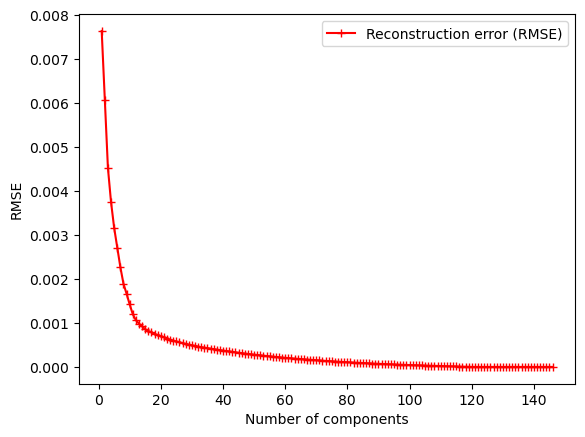

In [38]:
def reconstruction_error(X, principal_components, mu):
    """
    Calculates the reconstruction error after projecting data into a lower-dimensional space
    and then reconstructing it back to the original space. 

    Args:
        X: Original data matrix with shape NxD, where N is the number of samples and D is
           the number of original features.
        principal_components: A Dxk matrix containing the principal components used for 
           dimensionality reduction, where k is the number of components.
        mu: A D-element array representing the mean vector of the original data.

    Returns:
        The reconstruction error as a single float, representing the root mean squared
        error between the original and reconstructed data.
    """
    # Transform to latent space
    latent_space = transform_to_latent_space(X, principal_components, mu)
    
    # Reconstruct from latent space
    reconstructed_X = transform_from_latent_space(latent_space, principal_components, mu)
    
    # Calculate the reconstruction error (RMSE)
    rmse = np.sqrt(np.mean((X - reconstructed_X) ** 2))
    
    return rmse

def reconstruction_error_plot(X, principal_components, mu):
    errs = []
    for i in range(len(principal_components)):
        errs.append(reconstruction_error(X, principal_components[:, :i], mu))

    x = np.arange(1, len(principal_components) + 1, 1)

    plt.figure()
    plt.xlabel('Number of components')
    plt.ylabel('RMSE')
    plt.plot(x, errs, 'r-+')
    plt.legend(['Reconstruction error (RMSE)'])
    plt.show()

reconstruction_error_plot(shapes, comp, mu)